In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Assuming your datasets are in CSV format
driver_df = pd.read_csv('driver.csv')
driver_standings_df = pd.read_csv('drivers_standingss.csv')
# Add more datasets as needed

In [5]:
# Merge driver_df with driver_standings_df
merged_df = pd.merge(driver_df, driver_standings_df, on='driverId', how='inner')
# Add more merge operations as needed


In [6]:
print(driver_df.head())

   driverId   driverRef  forename     surname       dob nationality  \
0         1    hamilton     Lewis    Hamilton    1/7/85     British   
1         2    heidfeld      Nick    Heidfeld   5/10/77      German   
2         3     rosberg      Nico     Rosberg   6/27/85      German   
3         4      alonso  Fernando      Alonso   7/29/81     Spanish   
4         5  kovalainen    Heikki  Kovalainen  10/19/81     Finnish   

                                              url  
0     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2       http://en.wikipedia.org/wiki/Nico_Rosberg  
3    http://en.wikipedia.org/wiki/Fernando_Alonso  
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  


In [7]:
print(driver_standings_df.head())

   driverStandingsId  raceId  driverId  points  position  wins
0                  1      18         1    10.0         1     1
1                  2      18         2     8.0         2     0
2                  3      18         3     6.0         3     0
3                  4      18         4     5.0         4     0
4                  5      18         5     4.0         5     0


In [8]:
# Merge driver_df with driver_standings_df
merged_df = pd.merge(driver_df, driver_standings_df, on='driverId', how='inner')
# Add more merge operations as needed


In [9]:
print(merged_df.head())


   driverId driverRef forename   surname     dob nationality  \
0         1  hamilton    Lewis  Hamilton  1/7/85     British   
1         1  hamilton    Lewis  Hamilton  1/7/85     British   
2         1  hamilton    Lewis  Hamilton  1/7/85     British   
3         1  hamilton    Lewis  Hamilton  1/7/85     British   
4         1  hamilton    Lewis  Hamilton  1/7/85     British   

                                           url  driverStandingsId  raceId  \
0  http://en.wikipedia.org/wiki/Lewis_Hamilton                  1      18   
1  http://en.wikipedia.org/wiki/Lewis_Hamilton                  9      19   
2  http://en.wikipedia.org/wiki/Lewis_Hamilton                 27      20   
3  http://en.wikipedia.org/wiki/Lewis_Hamilton                 48      21   
4  http://en.wikipedia.org/wiki/Lewis_Hamilton                 69      22   

   points  position  wins  
0    10.0         1     1  
1    14.0         1     1  
2    14.0         3     1  
3    20.0         2     1  
4    28.0   

In [12]:
import pandas as pd
import re

#remove special characters
# Function to identify special characters in a string
def has_special_characters(s):
    # Define a regular expression pattern for special characters
    pattern = re.compile('[^A-Za-z0-9\s]+')
    return bool(pattern.search(s))

# Specify the columns you want to check for special characters
target_columns = ['forename', 'surname']

# Iterate through each specified column and row in the DataFrame
for column in target_columns:
    for index, value in merged_df[column].items():
        if has_special_characters(str(value)):
            print(f"Special character found in column '{column}', row {index}: {value}")

Special character found in column 'forename', row 1250: SÃ©bastien
Special character found in column 'forename', row 1251: SÃ©bastien
Special character found in column 'forename', row 1252: SÃ©bastien
Special character found in column 'forename', row 1253: SÃ©bastien
Special character found in column 'forename', row 1254: SÃ©bastien
Special character found in column 'forename', row 1255: SÃ©bastien
Special character found in column 'forename', row 1256: SÃ©bastien
Special character found in column 'forename', row 1257: SÃ©bastien
Special character found in column 'forename', row 1258: SÃ©bastien
Special character found in column 'forename', row 1259: SÃ©bastien
Special character found in column 'forename', row 1260: SÃ©bastien
Special character found in column 'forename', row 1261: SÃ©bastien
Special character found in column 'forename', row 1262: SÃ©bastien
Special character found in column 'forename', row 1263: SÃ©bastien
Special character found in column 'forename', row 1264: SÃ©bas

In [62]:
grouped_by_driver = merged_df.groupby('driverId')


In [64]:
# For example, to get information about driver with driverId 1
driver_1_info = grouped_by_driver.get_group(1)
print(driver_1_info)


     driverId driverRef number code forename   surname     dob nationality  \
0           1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
1           1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
2           1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
3           1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
4           1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
..        ...       ...    ...  ...      ...       ...     ...         ...   
322         1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
323         1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
324         1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
325         1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   
326         1  hamilton     44  HAM    Lewis  Hamilton  1/7/85     British   

                                             url  driverStandin

In [65]:
# Display summary statistics for numerical columns
print(merged_df.describe())


           driverId  driverStandingsId        raceId        points  \
count  34234.000000       34234.000000  34234.000000  34234.000000   
mean     308.750453       42631.217211    574.385640     13.686666   
std      268.393298       21759.863200    285.341336     36.115432   
min        1.000000           1.000000      1.000000      0.000000   
25%       87.000000       19677.250000    348.250000      0.000000   
50%      221.000000       49729.500000    597.000000      1.000000   
75%      510.000000       59028.750000    798.000000     10.000000   
max      859.000000       72363.000000   1115.000000    454.000000   

           position          wins  
count  34234.000000  34234.000000  
mean      19.870188      0.270754  
std       16.380498      1.005250  
min        1.000000      0.000000  
25%        8.000000      0.000000  
50%       16.000000      0.000000  
75%       26.000000      0.000000  
max      108.000000     15.000000  


In [66]:
# Check for missing values
print(merged_df.isnull().sum())


driverId             0
driverRef            0
number               0
code                 0
forename             0
surname              0
dob                  0
nationality          0
url                  0
driverStandingsId    0
raceId               0
points               0
position             0
wins                 0
dtype: int64


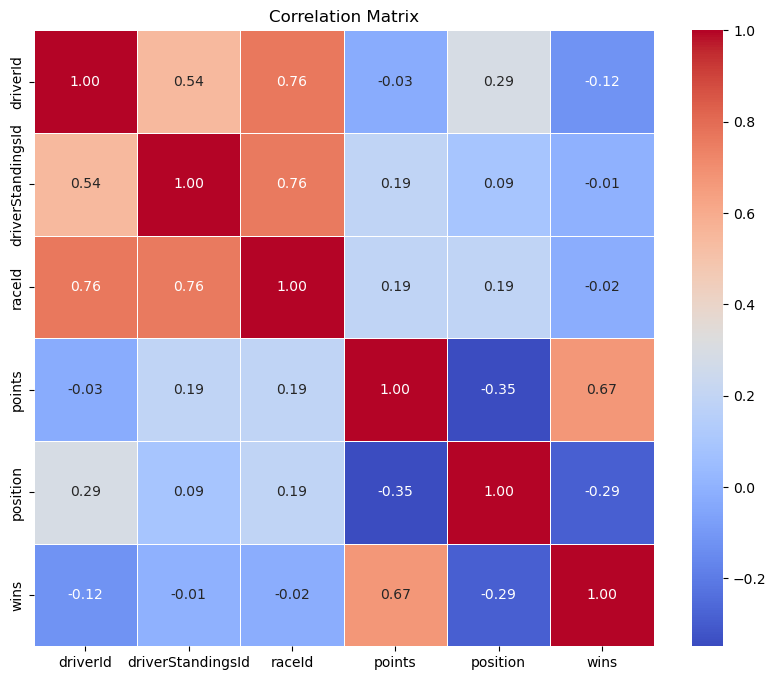

In [67]:
# Exclude non-numeric columns from correlation analysis
numerical_columns_only = merged_df.select_dtypes(include=['int64', 'float64'])

# Compute and visualize the correlation matrix
correlation_matrix = numerical_columns_only.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [84]:
# Number of drivers in the dataset
num_drivers = len(grouped_by_driver)
print(f"Number of drivers in the dataset: {num_drivers}")

# Number of races for each driver
num_races_by_driver = grouped_by_driver['raceId'].count()
print("\nNumber of races for each driver:")
print(num_races_by_driver.head())


# total points obtained by driver
mean_points_by_driver = grouped_by_driver['points'].sum()
print("\ntotal points obtained by drivers:")
print(mean_points_by_driver.head())

Number of drivers in the dataset: 851

Number of races for each driver:
driverId
1    327
2    194
3    206
4    377
5    111
Name: raceId, dtype: int64

total points obtained by drivers:
driverId
1    47434.5
2     2830.0
3    16910.0
4    22557.0
5      953.0
Name: points, dtype: float64


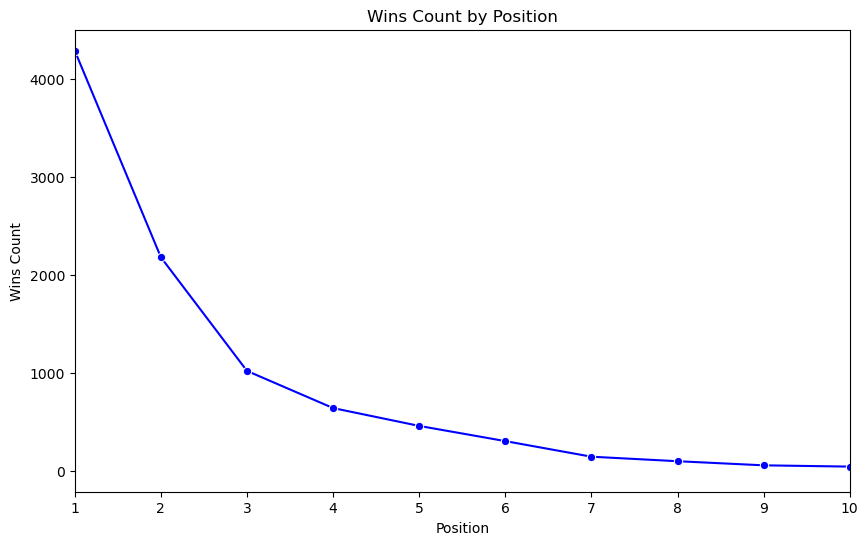

In [80]:
# Group by position and calculate the count of wins for each position
position_wins = merged_df.groupby('position')['wins'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='position', y='wins', data=position_wins, marker='o', color='blue')
plt.title('Wins Count by Position')
plt.xlabel('Position')
plt.ylabel('Wins Count')

# Set x-axis limits to display positions from 1 to 10
plt.xlim(1, 10)
plt.show()


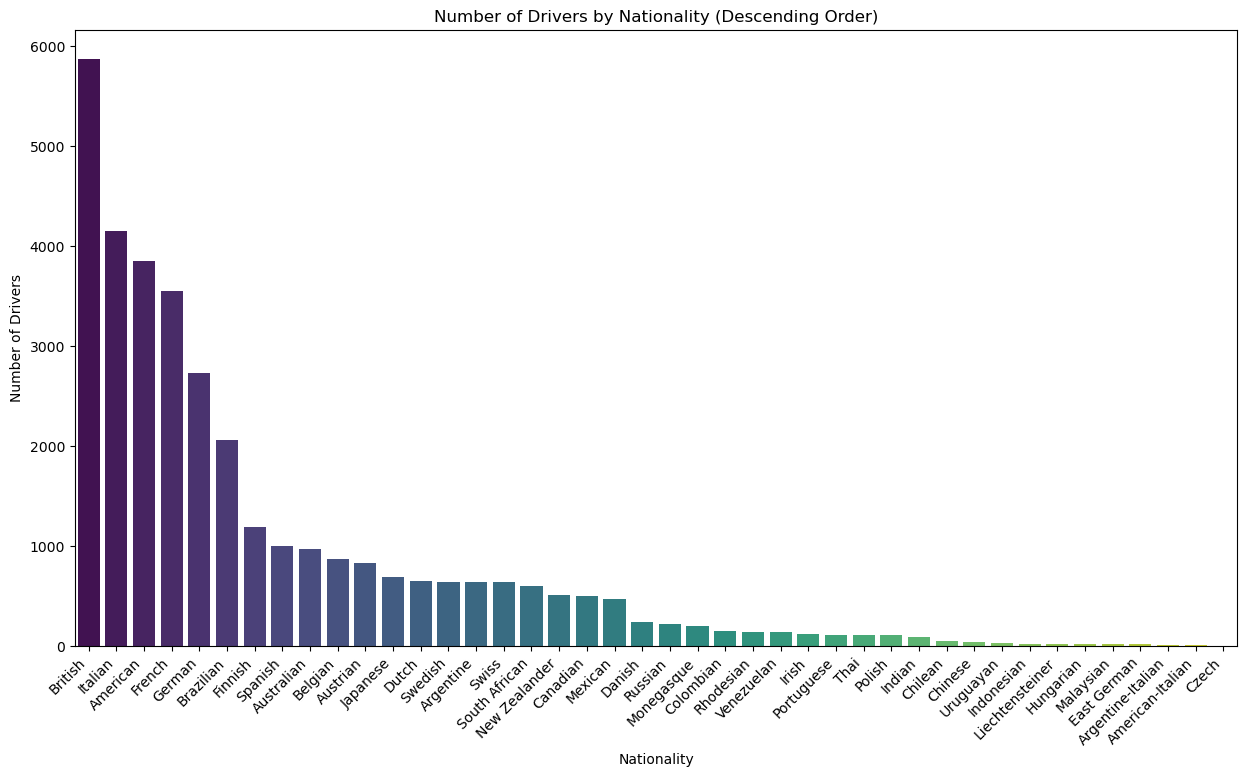

In [94]:
# Count the number of drivers for each nationality and order in descending order
nationality_counts = merged_df['nationality'].value_counts()
order = nationality_counts.index

plt.figure(figsize=(15, 8))
sns.countplot(x='nationality', data=merged_df, palette='viridis', order=order)
plt.title('Number of Drivers by Nationality (Descending Order)')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()


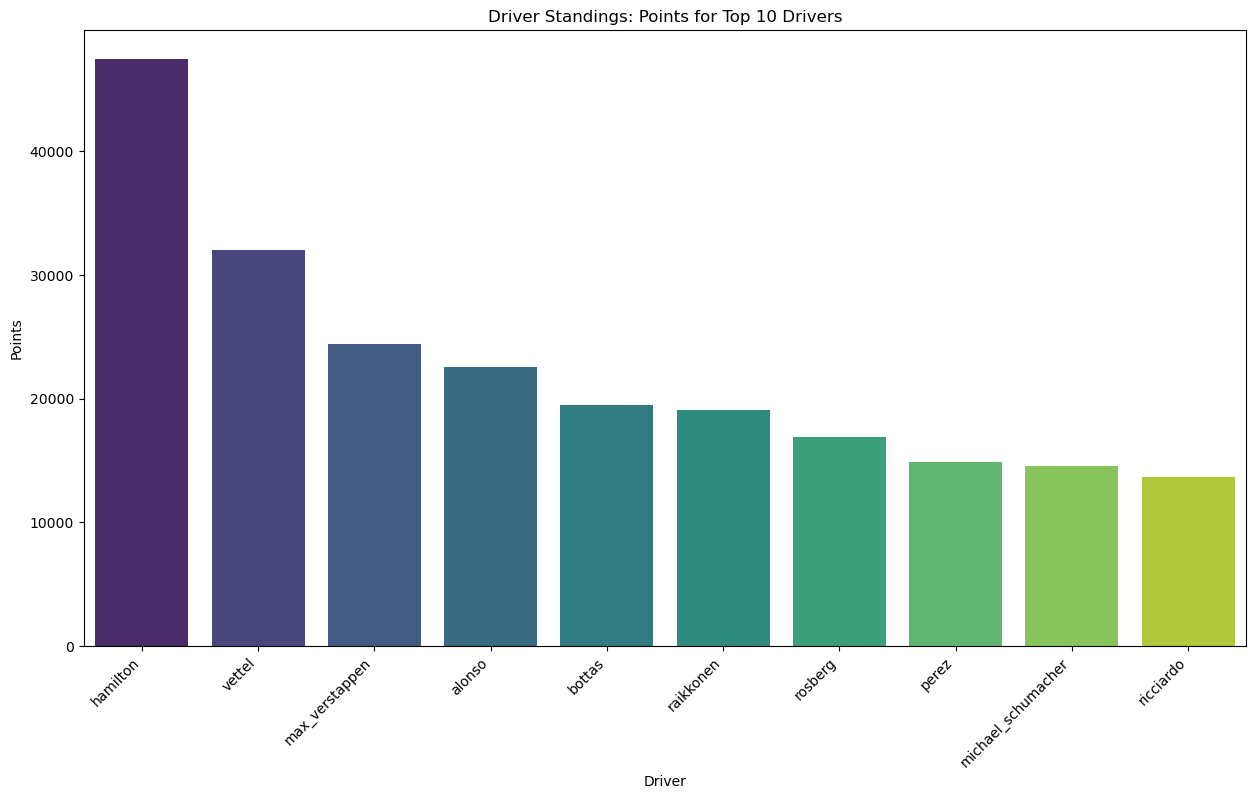

In [99]:

# Group by driver and calculate the sum of points and wins for each driver
driver_standings = merged_df.groupby('driverRef').agg({'points': 'sum', 'wins': 'sum'}).reset_index()

# Sort the DataFrame by points in descending order
driver_standings = driver_standings.sort_values(by='points', ascending=False)

# Select the top 10 drivers
top_10_drivers = driver_standings.head(10)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='driverRef', y='points', data=top_10_drivers, palette='viridis')
plt.title('Driver Standings: Points for Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()
